# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Lecture 7 </span>

##  <span style="color:blue"> Exercise 7.1

Print out instantaneous values of potential energy per particle along equilibrated Monte Carlo simulations ($M=5\times 10^5$ MC steps) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

Use of the results to
- Compute and make pictures of the autocorrelation functions of $U/N$ to approximately estimate how large the simulation blocks should be.
- Study the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. Make pictures of these statistical uncertainties as a function of $L$.

### Instantaneous values of E

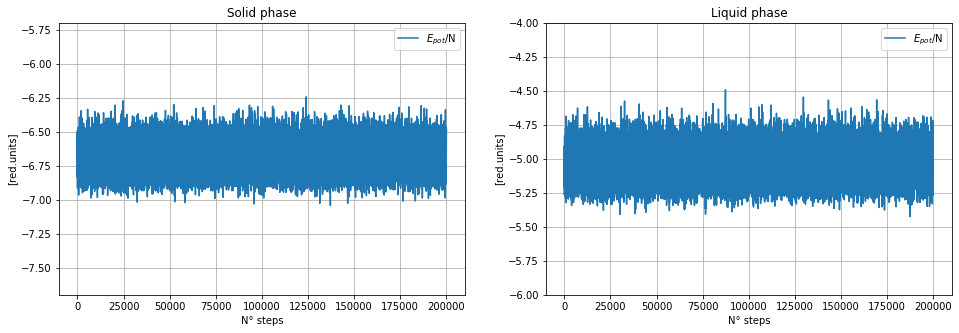

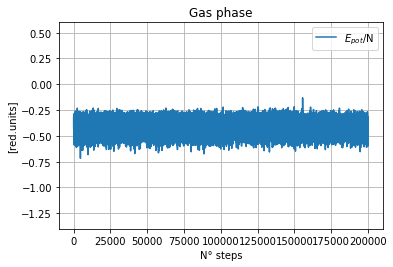

In [1]:
import numpy as np
import math
import matplotlib 
import matplotlib.pyplot as plt

N = 200000
Epot = np.zeros(N-1)
x = np.arange(N-1)

####SOLID
    
#Potential Energy
file3=open("./LSN_07.1/Solid/inst_energy.dat")
line3=file3.readlines()
for i in range(1,N,1):
    a=line3[i].split(" ")
    Epot[i-1]=a[0]
file3.close()
    
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.plot(x,Epot,label="$E_{pot}$/N")
plt.xlabel("N° steps")
plt.ylabel("[red.units]")
plt.ylim(-7.7,-5.7)
plt.grid(True)
plt.legend()
plt.title("Solid phase")

####LIQUID
   
#Potential Energy
file3=open("./LSN_07.1/Liquid/inst_energy.dat")
line3=file3.readlines()
for i in range(1,N,1):
    a=line3[i].split(" ")
    Epot[i-1]=a[0]
file3.close()

plt.subplot(1, 2, 2)
plt.plot(x,Epot,label="$E_{pot}$/N")
plt.xlabel("N° steps")
plt.ylabel("[red.units]")
plt.ylim(-6,-4)
plt.grid(True)
plt.legend()
plt.title("Liquid phase")

####GAS
  
#Potential Energy
file3=open("./LSN_07.1/Gas/inst_energy.dat")
line3=file3.readlines()
for i in range(1,N,1):
    a=line3[i].split(" ")
    Epot[i-1]=a[0]
file3.close()
    
plt.figure(figsize=(5.8, 3.8))
plt.plot(x,Epot,label="$E_{pot}$/N")
plt.xlabel("N° steps")
plt.ylabel("[red.units]")
plt.ylim(-1.4,0.6)
plt.grid(True)
plt.legend()
plt.title("Gas phase")

plt.subplots_adjust(wspace=0.15)
plt.show()

### Autocorrelation of E

In [2]:
def autocorrelation(vet,tau):
    ntot=len(vet)
    nstop=ntot-tau
    ave=0
    ave2=0
    ave_t=0
    ave_t2=0
    ave_mix=0

    for i in range(ntot):
        ave+=vet[i]
        ave2+=vet[i]**2
        if(i+tau<ntot):
            #ave_t+=vet[i+tau]
            #ave_t2+=vet[i+tau]**2
            ave_mix+=vet[i]*vet[i+tau]
    ave/=ntot
    ave2/=ntot
    
    #ave_t/=nstop
    #ave_t2/=nstop
    ave_mix/=nstop
    
    ac=(ave_mix-ave**2)/(ave2-ave**2)
    
    return ac

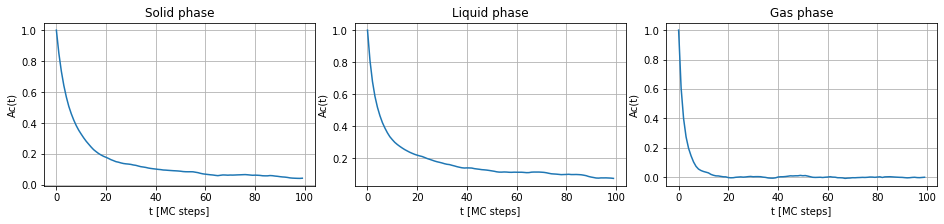

In [5]:
N=100000
pressure=np.zeros(N)
int_ene=np.zeros(N)
n_tau=100
ac_ene_solid=np.zeros(n_tau)
ac_ene_liquid=np.zeros(n_tau)
ac_ene_gas=np.zeros(n_tau)
x=np.arange(n_tau)

#SOLID 

file=open("./LSN_07.1/Solid/inst_energy.dat")
        
line=file.readlines()
for i in range(N):
    data=line[i].split()
    int_ene[i]=data[0]
    
for t in range(n_tau):
    ac_ene_solid[t]=autocorrelation(int_ene,t)
    
file.close()
    
#LIQUID 

file=open("./LSN_07.1/Liquid/inst_energy.dat")
        
line=file.readlines()
for i in range(N):
    data=line[i].split()
    int_ene[i]=data[0]
    
for t in range(n_tau):
    ac_ene_liquid[t]=autocorrelation(int_ene,t)
    
file.close()
    
#GAS

file=open("./LSN_07.1/Gas/inst_energy.dat")
        
line=file.readlines()
for i in range(N):
    data=line[i].split()
    int_ene[i]=data[0]
    
for t in range(n_tau):
    ac_ene_gas[t]=autocorrelation(int_ene,t)
    
file.close() 

#plot

plt.figure(figsize=(16, 3))

plt.subplot(1, 3, 1)
plt.plot(x,ac_ene_solid)
plt.xlabel("t [MC steps]")
plt.ylabel("Ac(t)")
plt.grid(True)
plt.title('Solid phase')

plt.subplot(1, 3, 2)
plt.plot(x,ac_ene_liquid)
plt.xlabel("t [MC steps]")
plt.ylabel("Ac(t)")
plt.grid(True)
plt.title('Liquid phase')

plt.subplot(1, 3, 3)
plt.plot(x,ac_ene_gas)
plt.xlabel("t [MC steps]")
plt.ylabel("Ac(t)")
plt.grid(True)
plt.title('Gas phase')

plt.subplots_adjust(wspace=0.15)
plt.show()

Ac functions drop to nearly zero in O(10-100) steps. One can thus adopt 100 as a safe estimate for the minimum length of the blocks and be guaranteed that averages on successive blocks are uncorrelated enough.

### Statistical uncertainties of E

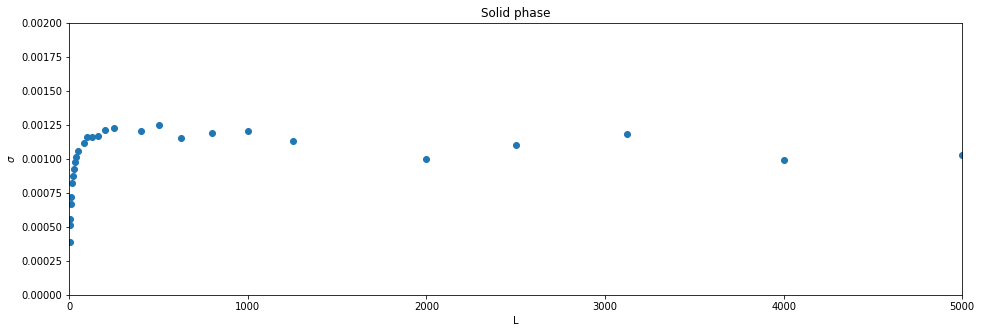

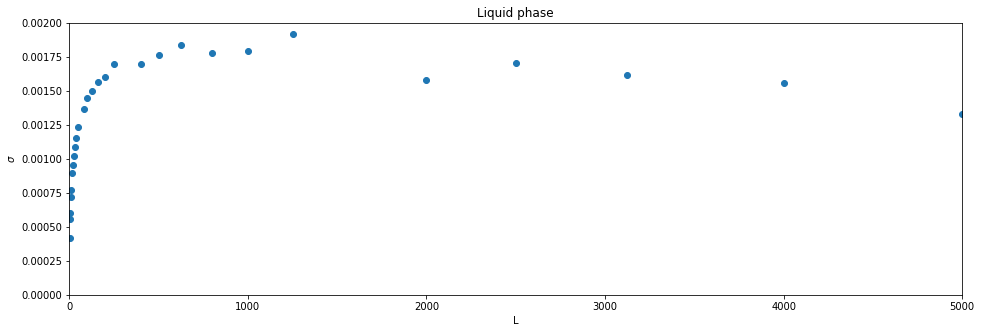

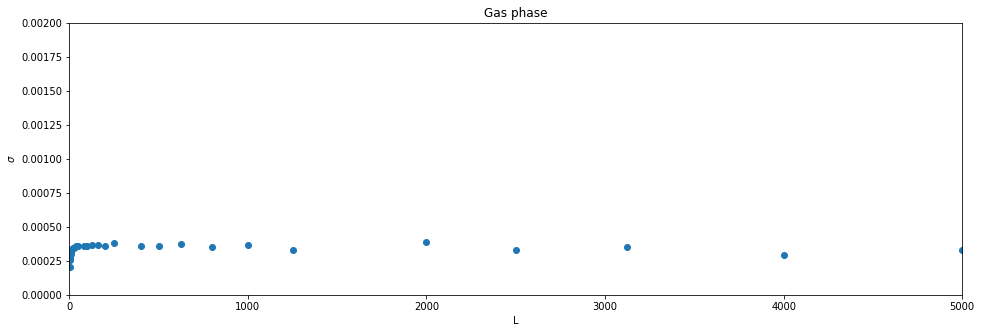

In [6]:
from array import array

def error(AV,AV2,n):  
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

L=[]   #Lengths of the blocks
n=[]   #Blocks
for i in range(2,N):
    if N%i==0:
        n.append(i)
        L.append(int(N/i))   #By this way we select all the integer lengths 
L=L[::-1]   #Not essential, but only to have lengths increasing
n=n[::-1]

ave_ene = np.zeros(n[0])   #We make this array of the biggest size to avoid using a dynamical array
err_ene=np.zeros(len(L))


for phase in range(1,4):
    if(phase==1):
        file=open("./LSN_07.1/Solid/inst_energy.dat")
    if(phase==2):
        file=open("./LSN_07.1/Liquid/inst_energy.dat")
    if(phase==3):
        file=open("./LSN_07.1/Gas/inst_energy.dat")

    line=file.readlines()
    for i in range(N):
        data=line[i].split()
        int_ene[i]=data[0]
    
    for l in range(len(L)):
        
        for i in range(n[0]):
            ave_ene[i]=0
        
        for i in range(n[l]):
            for j in range(L[l]):
                k = j+i*L[l]
                ave_ene[i] += int_ene[k]
            ave_ene[i] /= L[l]  
        
        sum_p =0
        su2_p =0
        
        for i in range(n[l]):
            sum_p += ave_ene[i]
            su2_p += ave_ene[i]**2 
        sum_p /= n[l]
        su2_p /= n[l]
        err_ene[l]=math.sqrt((su2_p - sum_p**2)/n[l])   #Statistical uncertainty on energy
                    
    plt.figure(figsize=(16, 5))

    plt.scatter(L,err_ene)
    plt.xlabel("L")
    plt.ylabel('$\sigma$')
    
    if phase==1:
        plt.title('Solid phase')
        plt.ylim([0,0.002])
        plt.xlim([0,5000])
    if phase==2:
        plt.title('Liquid phase')
        plt.ylim([0,0.002])
        plt.xlim([0,5000])
    if phase==3:
        plt.title('Gas phase')  
        plt.ylim([0,0.002])
        plt.xlim([0,5000])

A safe estimate for L lies around 1000 (used in the following), by which value the behaviour of the plots has become stable.

##  <span style="color:blue"> Exercise 7.4

Equilibration and MC-NVT simulations via a Lennard-Jones model of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

Shown in pictures are the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$, compared with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions (the MD code is built on the MC one, discarding that from Lecture 4). Blocking parameters: 200 blocks with 1000 steps each.

### Solid

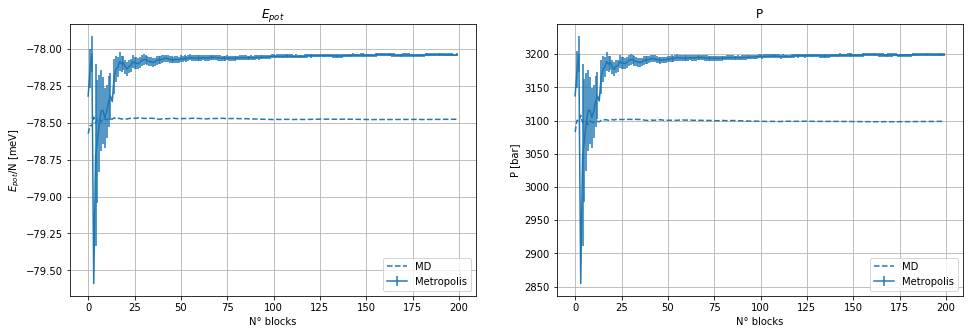

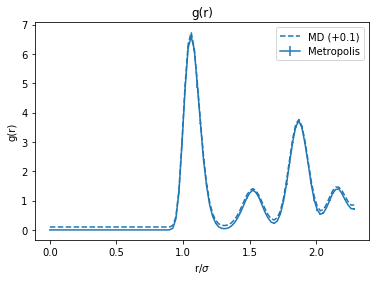

METROPOLIS
Potential energy = -78.0417 ± 0.0094 meV/particle
Pressure = 3199.2855 ± 2.1097 bar

MD
Potential energy = -78.4773 ± 0.0049 meV/particle
Pressure = 3099.0072 ± 1.099 bar


In [21]:
#LJ parameters for Ar
sigma = 0.34*10**(-9)
eps_K = 120
mass = 39.948*1.66054*10**(-27)
K = 1.3806*10**(-23)
eps = eps_K*K
J_to_meV = 6.2415093433*10**(21)

M = 200
sum_prog1 = np.zeros(M)
err_prog1 = np.zeros(M)
sum_prog1_MD = np.zeros(M)
err_prog1_MD = np.zeros(M)
sum_prog2 = np.zeros(M)
err_prog2 = np.zeros(M)
sum_prog2_MD = np.zeros(M)
err_prog2_MD = np.zeros(M)
y = np.arange(M)
Nbin = 100
r = np.zeros(Nbin)
sum_prog3 = np.zeros(Nbin)
err_prog3 = np.zeros(Nbin)
r_MD = np.zeros(Nbin)
sum_prog3_MD = np.zeros(Nbin)
err_prog3_MD = np.zeros(Nbin)

#SOLID

file1=open("./LSN_07.1/Solid/output.epot.0")
file2=open("./LSN_07.1/Solid/output.pres.0") 
file3=open("./LSN_07.1/Solid/output.gave.0")
file1MD=open("./MD/Solid/output.epot.0")
file2MD=open("./MD/Solid/output.pres.0") 
file3MD=open("./MD/Solid/output.gave.0")

#Total Energy 
line1=file1.readlines()
for i in range(M):
    a=line1[i].split(" ")
    sum_prog1[i]=a[2]
    err_prog1[i]=a[3]
file1.close()

line1=file1MD.readlines()
for i in range(M):
    a=line1[i].split(" ")
    sum_prog1_MD[i]=a[2]
    err_prog1_MD[i]=a[3]
file1.close()

#Pressure
line2=file2.readlines()
for i in range(M):
    b=line2[i].split(" ")
    sum_prog2[i]=b[2]
    err_prog2[i]=b[3]
file2.close()

line2=file2MD.readlines()
for i in range(M):
    b=line2[i].split(" ")
    sum_prog2_MD[i]=b[2]
    err_prog2_MD[i]=b[3]
file2.close()

#g(r)
line3=file3.readlines()
for i in range(Nbin):
    c=line3[i].split(" ")
    r[i]=c[0]
    sum_prog3[i]=c[1]
    err_prog3[i]=c[2]
file3.close()

line3=file3MD.readlines()
for i in range(Nbin):
    c=line3[i].split(" ")
    r_MD[i]=c[0]
    sum_prog3_MD[i]=c[1]
    err_prog3_MD[i]=c[2]
file3.close()

#plot

plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.errorbar(y, sum_prog1*eps*J_to_meV, yerr=err_prog1*eps*J_to_meV,color='tab:blue',label='Metropolis')
plt.plot(y,sum_prog1_MD*eps*J_to_meV,color='tab:blue',linestyle='dashed',label='MD')
plt.xlabel("N° blocks")
plt.ylabel("$E_{pot}$/N [meV]")
plt.grid(True)
plt.title("$E_{pot}$")
plt.legend()

plt.subplot(1, 2, 2)
plt.errorbar(y, sum_prog2*eps*(1./(sigma**3))*(10**(-5)), yerr=err_prog2*eps*(1./(sigma**3))*(10**(-5)),color='tab:blue',label='Metropolis')
plt.plot(y, sum_prog2_MD*eps*(1./(sigma**3))*(10**(-5)),color='tab:blue',linestyle='dashed',label='MD')
plt.xlabel("N° blocks")
plt.ylabel("P [bar]")
plt.grid(True)
plt.title('P')
plt.legend()

plt.subplots_adjust(wspace=0.2)
plt.show()

plt.figure()
plt.errorbar(r, sum_prog3, yerr=err_prog3,color='tab:blue',label='Metropolis')
plt.plot(r_MD, sum_prog3_MD+0.1, color='tab:blue', linestyle='dashed',label='MD (+0.1)')
plt.xlabel("r/$\sigma$")
plt.ylabel("g(r)")
plt.grid(False)
plt.title('g(r)')
plt.legend()
plt.show()

print('METROPOLIS')
print("Potential energy =", round(sum_prog1[199]*eps*J_to_meV,4), u"\u00b1",  round(err_prog1[199]*eps*J_to_meV,4), "meV/particle")
print("Pressure =", round(sum_prog2[199]*eps*(1./(sigma**3))*(10**(-5)),4), u"\u00b1",  round(err_prog2[199]*eps*(1./(sigma**3))*(10**(-5)),4), "bar")
print()
print('MD')
print("Potential energy =", round(sum_prog1_MD[199]*eps*J_to_meV,4), u"\u00b1",  round(err_prog1_MD[199]*eps*J_to_meV,4), "meV/particle")
print("Pressure =", round(sum_prog2_MD[199]*eps*(1./(sigma**3))*(10**(-5)),4), u"\u00b1",  round(err_prog2_MD[199]*eps*(1./(sigma**3))*(10**(-5)),4), "bar")

### Liquid

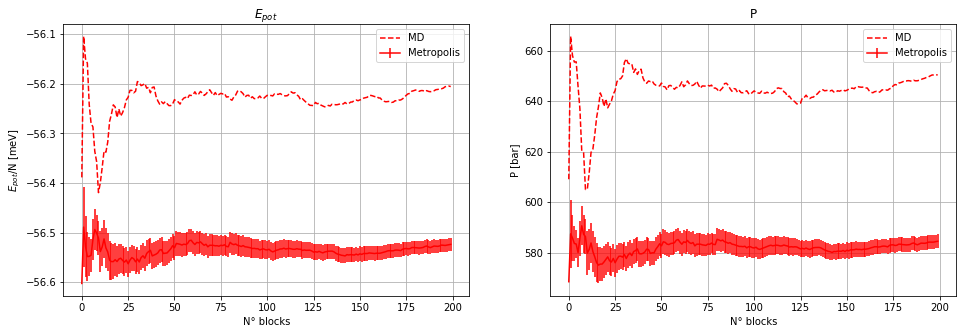

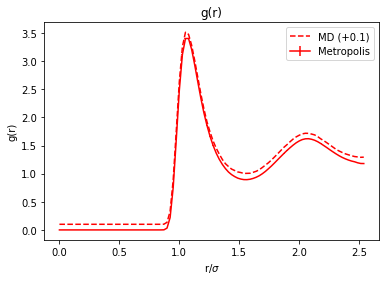

METROPOLIS
Potential energy = -56.5236 ± 0.013 meV/particle
Pressure = 584.5266 ± 2.6886 bar

MD
Potential energy = -56.2054 ± 0.0227 meV/particle
Pressure = 650.3966 ± 4.9885 bar


In [23]:
M = 200
sum_prog1 = np.zeros(M)
err_prog1 = np.zeros(M)
sum_prog1_MD = np.zeros(M)
err_prog1_MD = np.zeros(M)
sum_prog2 = np.zeros(M)
err_prog2 = np.zeros(M)
sum_prog2_MD = np.zeros(M)
err_prog2_MD = np.zeros(M)
y = np.arange(M)
Nbin = 100
r = np.zeros(Nbin)
sum_prog3 = np.zeros(Nbin)
err_prog3 = np.zeros(Nbin)
r_MD = np.zeros(Nbin)
sum_prog3_MD = np.zeros(Nbin)
err_prog3_MD = np.zeros(Nbin)

#SOLID

file1=open("./LSN_07.1/Liquid/output.epot.0")
file2=open("./LSN_07.1/Liquid/output.pres.0") 
file3=open("./LSN_07.1/Liquid/output.gave.0")
file1MD=open("./MD/Liquid/output.epot.0")
file2MD=open("./MD/Liquid/output.pres.0") 
file3MD=open("./MD/Liquid/output.gave.0")

#Total Energy 
line1=file1.readlines()
for i in range(M):
    a=line1[i].split(" ")
    sum_prog1[i]=a[2]
    err_prog1[i]=a[3]
file1.close()

line1=file1MD.readlines()
for i in range(M):
    a=line1[i].split(" ")
    sum_prog1_MD[i]=a[2]
    err_prog1_MD[i]=a[3]
file1.close()

#Pressure
line2=file2.readlines()
for i in range(M):
    b=line2[i].split(" ")
    sum_prog2[i]=b[2]
    err_prog2[i]=b[3]
file2.close()

line2=file2MD.readlines()
for i in range(M):
    b=line2[i].split(" ")
    sum_prog2_MD[i]=b[2]
    err_prog2_MD[i]=b[3]
file2.close()

#g(r)
line3=file3.readlines()
for i in range(Nbin):
    c=line3[i].split(" ")
    r[i]=c[0]
    sum_prog3[i]=c[1]
    err_prog3[i]=c[2]
file3.close()

line3=file3MD.readlines()
for i in range(Nbin):
    c=line3[i].split(" ")
    r_MD[i]=c[0]
    sum_prog3_MD[i]=c[1]
    err_prog3_MD[i]=c[2]
file3.close()

#plot

plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.errorbar(y, sum_prog1*eps*J_to_meV, yerr=err_prog1*eps*J_to_meV,color='red',label='Metropolis')
plt.plot(y,sum_prog1_MD*eps*J_to_meV,color='red',linestyle='dashed',label='MD')
plt.xlabel("N° blocks")
plt.ylabel("$E_{pot}$/N [meV]")
plt.grid(True)
plt.title("$E_{pot}$")
plt.legend()

plt.subplot(1, 2, 2)
plt.errorbar(y, sum_prog2*eps*(1./(sigma**3))*(10**(-5)), yerr=err_prog2*eps*(1./(sigma**3))*(10**(-5)),color='red',label='Metropolis')
plt.plot(y, sum_prog2_MD*eps*(1./(sigma**3))*(10**(-5)),color='red',linestyle='dashed',label='MD')
plt.xlabel("N° blocks")
plt.ylabel("P [bar]")
plt.grid(True)
plt.title('P')
plt.legend()

plt.subplots_adjust(wspace=0.2)
plt.show()

plt.figure()
plt.errorbar(r, sum_prog3, yerr=err_prog3,color='red',label='Metropolis')
plt.plot(r_MD, sum_prog3_MD+0.1, color='red', linestyle='dashed',label='MD (+0.1)')
plt.xlabel("r/$\sigma$")
plt.ylabel("g(r)")
plt.grid(False)
plt.title('g(r)')
plt.legend()
plt.show()

print('METROPOLIS')
print("Potential energy =", round(sum_prog1[199]*eps*J_to_meV,4), u"\u00b1",  round(err_prog1[199]*eps*J_to_meV,4), "meV/particle")
print("Pressure =", round(sum_prog2[199]*eps*(1./(sigma**3))*(10**(-5)),4), u"\u00b1",  round(err_prog2[199]*eps*(1./(sigma**3))*(10**(-5)),4), "bar")
print()
print('MD')
print("Potential energy =", round(sum_prog1_MD[199]*eps*J_to_meV,4), u"\u00b1",  round(err_prog1_MD[199]*eps*J_to_meV,4), "meV/particle")
print("Pressure =", round(sum_prog2_MD[199]*eps*(1./(sigma**3))*(10**(-5)),4), u"\u00b1",  round(err_prog2_MD[199]*eps*(1./(sigma**3))*(10**(-5)),4), "bar")

### Gas

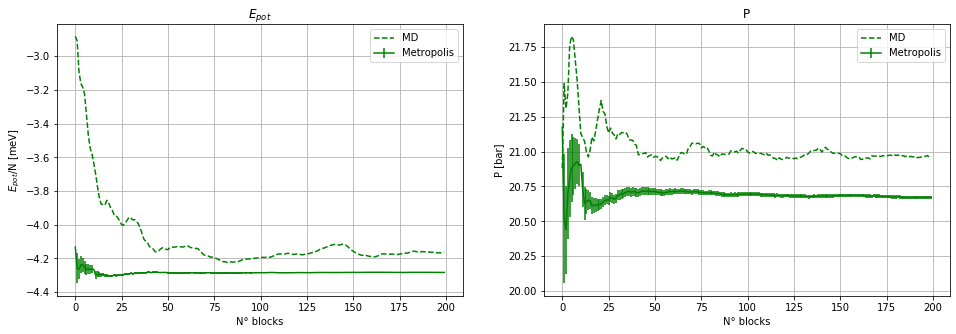

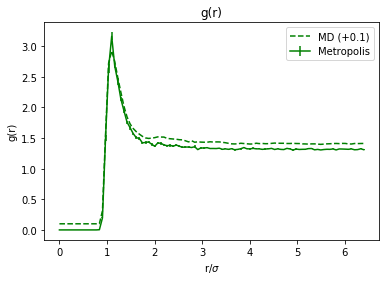

METROPOLIS
Potential energy = -4.2825 ± 0.0028 meV/particle
Pressure = 20.6721 ± 0.0109 bar

MD
Potential energy = -4.1627 ± 0.0331 meV/particle
Pressure = 20.9649 ± 0.0818 bar


In [24]:
M = 200
sum_prog1 = np.zeros(M)
err_prog1 = np.zeros(M)
sum_prog1_MD = np.zeros(M)
err_prog1_MD = np.zeros(M)
sum_prog2 = np.zeros(M)
err_prog2 = np.zeros(M)
sum_prog2_MD = np.zeros(M)
err_prog2_MD = np.zeros(M)
y = np.arange(M)
Nbin = 100
r = np.zeros(Nbin)
sum_prog3 = np.zeros(Nbin)
err_prog3 = np.zeros(Nbin)
r_MD = np.zeros(Nbin)
sum_prog3_MD = np.zeros(Nbin)
err_prog3_MD = np.zeros(Nbin)

#SOLID

file1=open("./LSN_07.1/Gas/output.epot.0")
file2=open("./LSN_07.1/Gas/output.pres.0") 
file3=open("./LSN_07.1/Gas/output.gave.0")
file1MD=open("./MD/Gas/output.epot.0")
file2MD=open("./MD/Gas/output.pres.0") 
file3MD=open("./MD/Gas/output.gave.0")

#Total Energy 
line1=file1.readlines()
for i in range(M):
    a=line1[i].split(" ")
    sum_prog1[i]=a[2]
    err_prog1[i]=a[3]
file1.close()

line1=file1MD.readlines()
for i in range(M):
    a=line1[i].split(" ")
    sum_prog1_MD[i]=a[2]
    err_prog1_MD[i]=a[3]
file1.close()

#Pressure
line2=file2.readlines()
for i in range(M):
    b=line2[i].split(" ")
    sum_prog2[i]=b[2]
    err_prog2[i]=b[3]
file2.close()

line2=file2MD.readlines()
for i in range(M):
    b=line2[i].split(" ")
    sum_prog2_MD[i]=b[2]
    err_prog2_MD[i]=b[3]
file2.close()

#g(r)
line3=file3.readlines()
for i in range(Nbin):
    c=line3[i].split(" ")
    r[i]=c[0]
    sum_prog3[i]=c[1]
    err_prog3[i]=c[2]
file3.close()

line3=file3MD.readlines()
for i in range(Nbin):
    c=line3[i].split(" ")
    r_MD[i]=c[0]
    sum_prog3_MD[i]=c[1]
    err_prog3_MD[i]=c[2]
file3.close()

#plot

plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.errorbar(y, sum_prog1*eps*J_to_meV, yerr=err_prog1*eps*J_to_meV,color='green',label='Metropolis')
plt.plot(y,sum_prog1_MD*eps*J_to_meV,color='green',linestyle='dashed',label='MD')
plt.xlabel("N° blocks")
plt.ylabel("$E_{pot}$/N [meV]")
plt.grid(True)
plt.title("$E_{pot}$")
plt.legend()

plt.subplot(1, 2, 2)
plt.errorbar(y, sum_prog2*eps*(1./(sigma**3))*(10**(-5)), yerr=err_prog2*eps*(1./(sigma**3))*(10**(-5)),color='green',label='Metropolis')
plt.plot(y, sum_prog2_MD*eps*(1./(sigma**3))*(10**(-5)),color='green',linestyle='dashed',label='MD')
plt.xlabel("N° blocks")
plt.ylabel("P [bar]")
plt.grid(True)
plt.title('P')
plt.legend()

plt.subplots_adjust(wspace=0.2)
plt.show()

plt.figure()
plt.errorbar(r, sum_prog3, yerr=err_prog3,color='green',label='Metropolis')
plt.plot(r_MD, sum_prog3_MD+0.1, color='green', linestyle='dashed',label='MD (+0.1)')
plt.xlabel("r/$\sigma$")
plt.ylabel("g(r)")
plt.grid(False)
plt.title('g(r)')
plt.legend()
plt.show()

print('METROPOLIS')
print("Potential energy =", round(sum_prog1[199]*eps*J_to_meV,4), u"\u00b1",  round(err_prog1[199]*eps*J_to_meV,4), "meV/particle")
print("Pressure =", round(sum_prog2[199]*eps*(1./(sigma**3))*(10**(-5)),4), u"\u00b1",  round(err_prog2[199]*eps*(1./(sigma**3))*(10**(-5)),4), "bar")
print()
print('MD')
print("Potential energy =", round(sum_prog1_MD[199]*eps*J_to_meV,4), u"\u00b1",  round(err_prog1_MD[199]*eps*J_to_meV,4), "meV/particle")
print("Pressure =", round(sum_prog2_MD[199]*eps*(1./(sigma**3))*(10**(-5)),4), u"\u00b1",  round(err_prog2_MD[199]*eps*(1./(sigma**3))*(10**(-5)),4), "bar")